#**Import Libraries**

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

#**Data Exploring & Cleaning**

In [337]:
df=pd.read_csv("/content/Indian_House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
0,NaN,2.0,1100.0,NaN,Super Area,Bandel,India-! Kolkata,Unfurnished,Bach^elors/Fam.ily,2.0,Contact Owner,10000
1,2022-05-13,2.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",India-! Kolkata,Semi-Furnished,Bachelors\/Family*,NaN,NaN,20000
2,2022-05-16,2.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,India-- Kolkata,Semi-Furnished,NaN,1.0,Contact Owner,17000
3,2022-07-04,2.0,800.0,1 out of 2,Super Area,NaN,NaN,Unfurnished,Bachel]ors/F@amily,1.0,NaN,10000
4,2022-05-09,2.0 room,850.0,1 out of 2,Carpet Area,South Dum Dum,India-^ Kolkata,Unfurnished,Bache[lors&,1.0,Contact Owner,7500


In [338]:
df.shape

(4746, 12)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4084 non-null   object
 1   BHK                3963 non-null   object
 2   Size               3826 non-null   object
 3   Floor              3960 non-null   object
 4   Area Type          3804 non-null   object
 5   Area Locality      4146 non-null   object
 6   City               4091 non-null   object
 7   Furnishing Status  4042 non-null   object
 8   Tenant Preferred   4094 non-null   object
 9   Bathroom           4205 non-null   object
 10  Point of Contact   4137 non-null   object
 11  Rent               4746 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 445.1+ KB


In [340]:
df.isnull().sum()

,0
Posted On,662
BHK,783
Size,920
Floor,786
Area Type,942
Area Locality,600
City,655
Furnishing Status,704
Tenant Preferred,652
Bathroom,541


In [341]:
df.describe()

,Rent
count,4.746000e+03
mean,3.499345e+04
std,7.810641e+04
min,1.200000e+03
25%,1.000000e+04
50%,1.600000e+04
75%,3.300000e+04
max,3.500000e+06


In [342]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Posted On: 81 unique values
BHK: 12 unique values
Size: 588 unique values
Floor: 433 unique values
Area Type: 5 unique values
Area Locality: 2017 unique values
City: 360 unique values
Furnishing Status: 3 unique values
Tenant Preferred: 4051 unique values
Bathroom: 13 unique values
Point of Contact: 2 unique values
Rent: 243 unique values


In [343]:
df.duplicated().sum()

np.int64(0)

#'Posted On' column

In [344]:
df['Posted On'].unique()

array([nan, '2022-05-13', '2022-05-16', '2022-07-04', '2022-05-09',
       '2022-04-29', '2022-06-21', '2022-06-07', '2022-05-23',
       '2022-05-05', '2022-05-17', '2022-06-20', '2022-06-09',
       '2022-06-14', '2022-05-28', '2022-05-22', '2022-06-25',
       '2022-06-22', '2022-05-21', '2022-06-26', '2022-06-16',
       '2022-06-29', '2022-05-10', '2022-05-12', '2022-05-31',
       '2022-06-10', '2022-06-06', '2022-05-20', '2022-07-02',
       '2022-07-03', '2022-04-23', '2022-05-14', '2022-05-27',
       '2022-06-19', '2022-07-06', '2022-06-04', '2022-06-24',
       '2022-05-18', '2022-05-30', '2022-06-18', '2022-06-08',
       '2022-05-03', '2022-05-07', '2022-06-27', '2022-04-28',
       '2022-06-28', '2022-06-23', '2022-06-13', '2022-05-15',
       '2022-05-04', '2022-04-25', '2022-05-06', '2022-06-30',
       '2022-07-01', '2022-06-17', '2022-05-26', '2022-05-11',
       '2022-06-12', '2022-06-05', '2022-06-11', '2022-05-25',
       '2022-06-01', '2022-04-30', '2022-05-24', '

In [345]:
#convert to date
df['Posted On'] = pd.to_datetime(df['Posted On'], errors='coerce')

df['Post_Age_Days'] = (df['Posted On'].max() - df['Posted On']).dt.days
df['Post_Age_Days'].fillna(df['Post_Age_Days'].median(), inplace=True)
df.drop('Posted On', axis=1, inplace=True)

#'City' column

In [346]:
df['City'].unique()

array(['India-! Kolkata', 'India-- Kolkata', nan, 'India-^ Kolkata',
       'India-\\ Kolkata', 'India-% Kolkata', ',-9 Kolkata',
       'India-/ Kolkata', '(-9 Kolkata', '^-9 Kolkata', '--9 Kolkata',
       'India-* Kolkata', 'India-; Kolkata', 'India-. Kolkata',
       '!-9 Kolkata', ':-9 Kolkata', '\\-9 Kolkata', ';-9 Kolkata',
       'India-> Kolkata', '.-9 Kolkata', 'India-@ Kolkata',
       'India-{ Kolkata', 'India-[ Kolkata', 'India-| Kolkata',
       'India-} Kolkata', '"-9 Kolkata', '|-9 Kolkata', "'-9 Kolkata",
       '>-9 Kolkata', 'India-? Kolkata', '}-9 Kolkata', '#-9 Kolkata',
       'India-$ Kolkata', ']-9 Kolkata', 'India-< Kolkata', '$-9 Kolkata',
       'India-] Kolkata', '<-9 Kolkata', 'India-: Kolkata',
       'India-# Kolkata', 'India-+ Kolkata', '+-9 Kolkata',
       'India-& Kolkata', 'India-, Kolkata', '%-9 Kolkata',
       'India-( Kolkata', 'India-_ Kolkata', '@-9 Kolkata', '=-9 Kolkata',
       'India-" Kolkata', '/-9 Kolkata', '_-9 Kolkata', '?-9 Kolkata',


In [347]:
df['City'] = df['City'].str.split().str[-1]
df['City'] = df['City'].fillna("Unknown")
df['City'].unique()

array(['Kolkata', 'Unknown', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai',
       'Hyderabad'], dtype=object)

# 'BHK' Column

In [348]:
df['BHK'].unique()

array(['2.0', '2.0 room', '1.0', nan, '3.0', '1.0 room', '6.0', '4.0',
       '3.0 room', '5.0', '5.0 room', '4.0 room', '6.0 room'],
      dtype=object)

In [349]:
df['BHK'] = df['BHK'].astype(str).str.extract(r'(\d+)').astype(float)
bhk_mode = df['BHK'].mode()[0]
df['BHK'] = df.groupby('City')['BHK'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else bhk_mode))
df['BHK'].unique()

array([2., 1., 3., 6., 4., 5.])

# 'Size' Column

In [350]:
df['Size'].unique()

array(['1100.0', '800.0', '1000.0', '850.0', '600.0', '700.0', '250.0',
       nan, '1200.0', '400.0', '375.0', '900.0', '1286.0', '2000.0',
       '650.0', '300.0', '1600.0', '355.0', '350.0', '550.0', '500.0',
       '630.0', '270.0', '1500.0', '1068.0', '150.0', '450.0', '720.0',
       '680.0', '950.0', '1800.0', '480.0', '435.0', '1300.0', '1450.0',
       '750.0', '220.0', '20.0', '200.0', '840.0', '740.0', '490.0',
       '280.0', '120.0', '1220.0', '670.0', '240.0', '2200.0', '685.0',
       '44.0', '392.0', '710.0', '1400.0', '160.0', '1250.0', '839.0',
       '230.0', '620.0', '1350.0Square Feet', '723.0', '320.0', '2160.0',
       '1700.0', '130.0', '505.0', '4000.0', '1190.0', '1012.0', '812.0',
       '420.0', '1750.0', '830.0', '1050.0', '960.0', '756.0', '288.0',
       '1600.0Square Feet', '986.0', '322.0', '957.0', '1430.0', '1320.0',
       '650.0Square Feet', '475.0', '550.0Square Feet', '570.0', '460.0',
       '530.0', '850.0Square Feet', '558.0', '175.0', '721.0',

In [351]:
df['Size'] = df['Size'].astype(str).str.extract('(\d+\.?\d*)')[0].astype(float)
df.loc[df['Size'] < 100, 'Size'] = np.nan
df['Size'] = df.groupby(['City', 'BHK'])['Size'].transform(
    lambda x: x.fillna(x.median())
)
df['Size'].fillna(df['Size'].median(), inplace=True)

In [352]:
df['Size'].describe()

,Size
count,4746.000000
mean,973.101981
std,584.659906
min,100.000000
25%,600.000000
50%,850.000000
75%,1200.000000
max,7000.000000


In [353]:
# Remove outliers in Size column using IQR
Q1 = df['Size'].quantile(0.25)
Q3 = df['Size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(((df['Size'] < lower_bound) | (df['Size'] > upper_bound)).sum())

187


In [354]:
# Remove rows with outliers
df = df[(df['Size'] >= lower_bound) & (df['Size'] <= upper_bound)]

#'Floor' column

In [355]:
df['Floor'].unique()

array([nan, '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 2',
       'Ground out of 3', '2 out of 3', '4 out of 5', '2 out of 2',
       '2 out of 5', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       'Ground out of 6', 'Upper Basement out of 4', 'Ground out of 5',
       '3 out of 5', '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '18 out of 24', '3 out of 7', '11 out of 21', '14 out of 23',
       '19 out of 24', '3 out of 21', '8 out of 8', '6 out of 12',
       '4 out of 58', '60 out of 66', '34 out of 48', '5 out of 8',
       '14 out of 40', '5 out of 7', '26 out of 44', '1 out of 8',
       '25 out of 42', '25 out of 41', '53 out of 78', 'Ground out

In [356]:
def parse_floor(val):
    if pd.isna(val):
        return (np.nan, np.nan)

    val = str(val)

    if "Ground" in val:
        total = val.split("out of")[-1].strip() if "out of" in val else np.nan
        return (0, float(total) if total.isdigit() else np.nan)

    if "Lower Basement" in val:
        total = val.split("out of")[-1].strip() if "out of" in val else np.nan
        return (-2, float(total) if total.isdigit() else np.nan)

    if "Upper Basement" in val:
        total = val.split("out of")[-1].strip() if "out of" in val else np.nan
        return (-1, float(total) if total.isdigit() else np.nan)

    if "out of" in val:
        floor, total = val.split("out of")
        return (float(floor.strip()), float(total.strip()))

    if val.isdigit():
        return (float(val), np.nan)

    return (np.nan, np.nan)

#applying the function
df[['Floor_num', 'Total_floors']] = df['Floor'].apply(parse_floor).apply(pd.Series)

In [357]:
df[['Floor_num', 'Total_floors']].isna().sum()

,0
Floor_num,754
Total_floors,757


In [358]:
df['Floor_num']=pd.to_numeric(df['Floor_num'],errors='coerce')
df['Total_floors']=pd.to_numeric(df['Total_floors'],errors='coerce')

# Impute Total_floors with the median per City
df['Total_floors'] = df.groupby('City')['Total_floors'].transform(
    lambda x: x.fillna(x.median())
)

# Impute Floor_num with the median per (City, Total_floors)
df['Floor_num'] = df.groupby(['City','Total_floors'])['Floor_num'].transform(
    lambda x: x.fillna(x.median())
)

#Fill remaining NaN values with the overall median
df['Floor_num'].fillna(df['Floor_num'].median(), inplace=True)
df['Total_floors'].fillna(df['Total_floors'].median(), inplace=True)

# Create a relative floor feature (Floor number / Total floors)
df['RelativeFloor'] = df['Floor_num'] / df['Total_floors']

# Drop the original Floor column
df.drop(columns=['Floor'], inplace=True)

In [359]:
df['Floor_num'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5.,  7., -1., 11., -2.,  6., 14., 43.,
       13., 10., 18., 19.,  8., 60., 34., 26., 25., 53., 16., 12., 32.,
       28., 17.,  9., 20., 15., 65., 40., 37., 21., 30., 35., 22., 44.,
       41., 27., 48., 29., 23., 36., 76., 24.])

#'Area Type' column

In [360]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', nan, 'CARPET AREA', 'SUPER AREA',
       'Built Area'], dtype=object)

In [361]:
df['Area Type'].value_counts()

,count
Area Type,
Super Area,1920
Carpet Area,1700
CARPET AREA,25
SUPER AREA,7
Built Area,2


In [362]:
df['Area Type'].isna().sum()

np.int64(905)

In [363]:
df['Area Type'] = df['Area Type'].str.strip().str.title()
# Drop Built Area rows
df = df[df['Area Type'] != 'Built Area']
df['Area Type'].value_counts()

,count
Area Type,
Super Area,1927
Carpet Area,1725


In [364]:
# Fill NaN with 'Unknown'
df['Area Type'] = df['Area Type'].fillna('Unknown')
df['Area Type'].isna().sum()

np.int64(0)

#'Area Locality' column

In [365]:
df['Area Locality'].isna().sum()

np.int64(571)

In [366]:
df['Area Locality'].nunique()

1962

In [367]:
df['Area Locality'].value_counts().head(10)

,count
Area Locality,
Bandra West,32
Electronic City,23
Gachibowli,23
"Miyapur, NH 9",19
Chembur,18
Kondapur,18
Velachery,16
Madipakkam,16
Medavakkam,16


In [368]:
# Fill NaN with 'Unknown'
df['Area Locality'] = df['Area Type'].fillna('Unknown')

#'Furnishing Status' column

In [369]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished', nan], dtype=object)

In [370]:
df['Furnishing Status'].value_counts()

,count
Furnishing Status,
Semi-Furnished,1806
Unfurnished,1521
Furnished,549


In [371]:
df['Furnishing Status'].isna().sum()

np.int64(681)

In [372]:
# Compare rent distribution for rows with and without Furnishing Status
df.groupby(df['Furnishing Status'].isna())['Rent'].mean()

,Rent
Furnishing Status,
False,29493.705624
True,29523.960352


In [373]:
df['Furnishing Status'] = df['Furnishing Status'].fillna('Unknown')

#'Tenant Preferred' column

In [374]:
df['Tenant Preferred'].unique()

array(['Bach^elors/Fam.ily', 'Bachelors\\/Family*', nan, ...,
       '!Bachelors+/Family', '$Family%', 'Bachelo%rs:'], dtype=object)

In [375]:
df['Tenant Preferred'].value_counts().head(20)

,count
Tenant Preferred,
Bachelors/F|am/ily,2
Ba]chelors/Fami'ly,2
Ba'che(lors/Family,2
Bachelors/Fami-ly\,2
B]achelor@s/Family,2
Bachelo;r;s,2
Family/&,2
*Bachelo}rs/Family,2
Bachelor;s/Fam&ily,2


In [376]:
df['Tenant Preferred'] = df['Tenant Preferred'].astype(str)

df['Tenant Preferred'] = df['Tenant Preferred'].apply(lambda x: re.sub(r'[^a-zA-Z\s/]', '', x).lower().strip())

df['Tenant Preferred'] = df['Tenant Preferred'].apply(lambda x:
    'Bachelors/Family' if 'bachelor' in x and 'family' in x else
    'Bachelors' if 'bachelor' in x else
    'Family' if 'family' in x else
    'Unknown'
)

In [377]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Unknown', 'Bachelors', 'Family'], dtype=object)

#'Bathroom' column

In [378]:
df['Bathroom'].unique()

array(['2.0', nan, '1.0', '1.0 Bathrooms', '2.0 Bathrooms', '3.0', '4.0',
       '5.0', '3.0 Bathrooms', '5.0 Bathrooms', '6.0', '4.0 Bathrooms',
       '10.0'], dtype=object)

In [379]:
df['Bathroom'] = df['Bathroom'].astype(str)

df['Bathroom'] = df['Bathroom'].apply(lambda x: re.sub(r'[^0-9\.]', '', x).strip())

df['Bathroom'] = df['Bathroom'].replace('', np.nan)

df['Bathroom'] = df['Bathroom'].astype(float)
df['Bathroom'].unique()

array([ 2., nan,  1.,  3.,  4.,  5.,  6., 10.])

In [380]:
df['Bathroom'].isna().sum(), df.shape[0]

(np.int64(521), 4557)

In [381]:
df.groupby('BHK')['Bathroom'].mean()

,Bathroom
BHK,
1.0,1.152225
2.0,1.831442
3.0,2.699176
4.0,3.691176
5.0,3.600000
6.0,4.000000


In [382]:
df[df['Bathroom'] > df['BHK'] + 2]

,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Post_Age_Days,Floor_num,Total_floors,RelativeFloor
651,2.0,1545.0,Carpet Area,Carpet Area,Mumbai,Semi-Furnished,Family,5.0,NaN,250000,18.0,65.0,78.0,0.833333
746,2.0,1286.0,Carpet Area,Carpet Area,Unknown,Unfurnished,Bachelors/Family,5.0,Contact Agent,100000,13.0,7.0,21.0,0.333333
982,1.0,680.0,Unknown,Unknown,Mumbai,Furnished,Bachelors/Family,4.0,Contact Agent,40000,14.0,5.0,7.0,0.714286
3019,3.0,1408.5,Carpet Area,Carpet Area,Chennai,Unknown,Bachelors/Family,6.0,Contact Owner,20000,31.0,1.0,3.0,0.333333
4185,1.0,500.0,Super Area,Super Area,Hyderabad,Unfurnished,Bachelors/Family,10.0,Contact Owner,200000,35.0,0.0,4.0,0.000000


In [383]:
df=df[df['Bathroom'] <= df['BHK'] + 2]

In [384]:
# Fill missing bathroom values based on median of each BHK group
df['Bathroom'] = df.groupby('BHK')['Bathroom'].transform(lambda x: x.fillna(x.median()))

# If still any missing values exist, fill with overall median
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())

df['Bathroom'].isna().sum()

np.int64(0)

#'Point of Contact' column

In [385]:
df['Point of Contact'].unique()

array(['Contact Owner', nan, 'Contact Agent'], dtype=object)

In [386]:
df['Point of Contact'].isna().sum()

np.int64(502)

In [387]:
df['Point of Contact'] = df['Point of Contact'].fillna('Unknown')

In [388]:
df.isnull().sum()

,0
BHK,0
Size,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,0
Point of Contact,0
Rent,0


#**EDA**

In [389]:
df.describe(include='all')

,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Post_Age_Days,Floor_num,Total_floors,RelativeFloor
count,4031.000000,4031.000000,4031,4031,4031,4031,4031,4031.000000,4031,4.031000e+03,4031.000000,4031.000000,4031.000000,4031.000000
unique,NaN,NaN,3,3,7,4,4,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Super Area,Super Area,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1709,1709,701,1580,2422,NaN,2485,NaN,NaN,NaN,NaN,NaN
mean,2.008435,888.277847,NaN,NaN,NaN,NaN,NaN,1.873729,NaN,2.900816e+04,33.171173,3.236418,6.393451,0.458489
std,0.691622,414.274832,NaN,NaN,NaN,NaN,NaN,0.763095,NaN,4.706511e+04,20.526844,5.116841,8.200587,0.303389
min,1.000000,100.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.200000e+03,0.000000,-2.000000,1.000000,-1.000000
25%,2.000000,600.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e+04,16.000000,1.000000,3.000000,0.250000
50%,2.000000,800.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,1.500000e+04,31.000000,2.000000,4.000000,0.500000
75%,2.000000,1100.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,3.000000e+04,49.000000,3.000000,5.000000,0.666667


In [390]:
df.corr(numeric_only=True)['Rent'].sort_values(ascending=False)

,Rent
Rent,1.000000
Bathroom,0.511927
Total_floors,0.453553
Floor_num,0.429383
BHK,0.396001
Size,0.335104
RelativeFloor,0.113647
Post_Age_Days,-0.136288


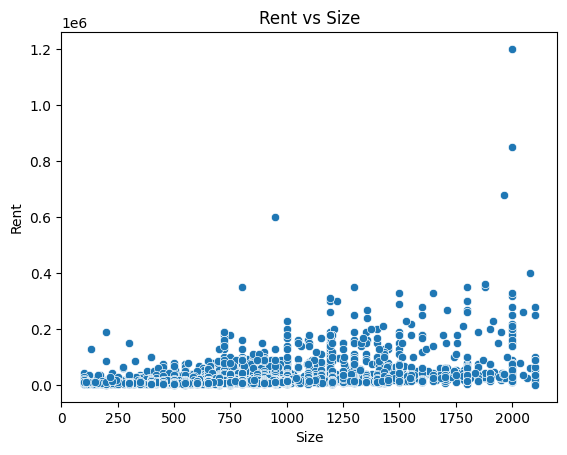

In [391]:
sns.scatterplot(x='Size', y='Rent', data=df)
plt.title('Rent vs Size')
plt.show()

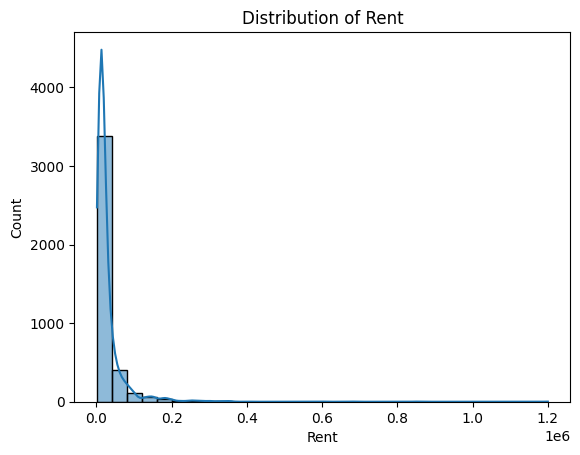

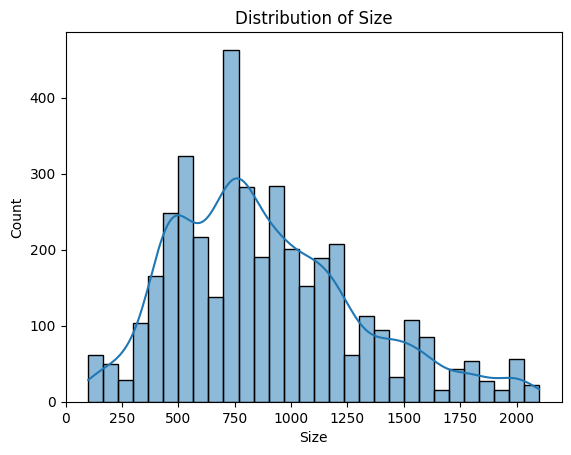

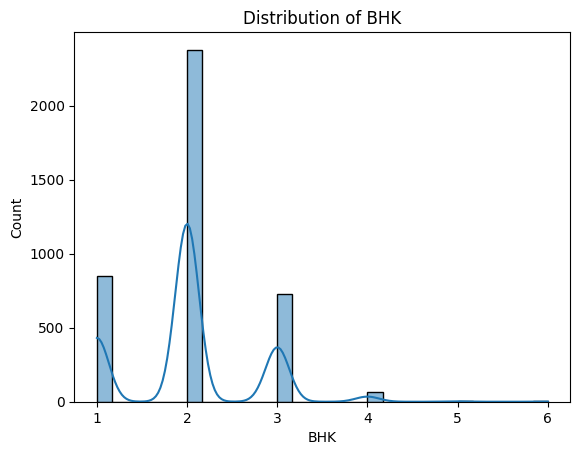

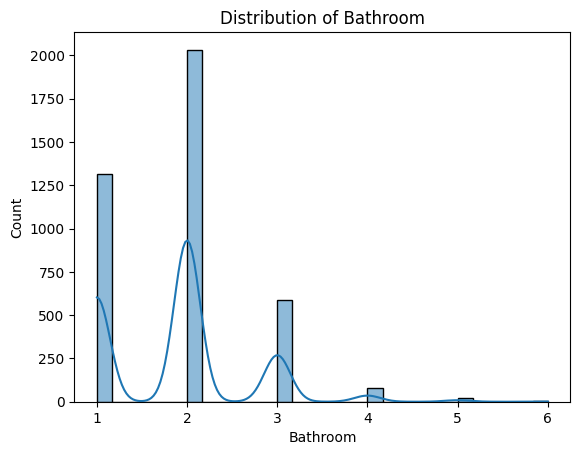

In [392]:
num_cols = ['Rent', 'Size', 'BHK', 'Bathroom']
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


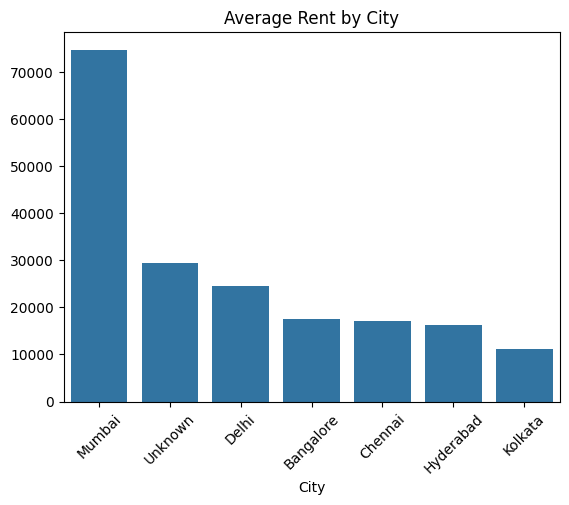

In [393]:
avg_rent_city = df.groupby('City')['Rent'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rent_city.index, y=avg_rent_city.values)
plt.title('Average Rent by City')
plt.xticks(rotation=45)
plt.show()


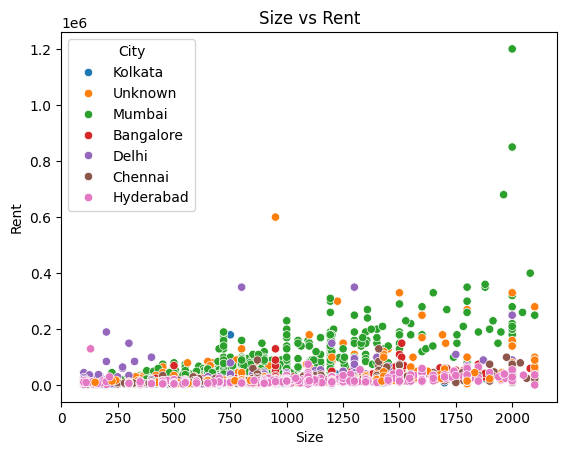

In [394]:
sns.scatterplot(x='Size', y='Rent', hue='City', data=df)
plt.title('Size vs Rent')
plt.show()

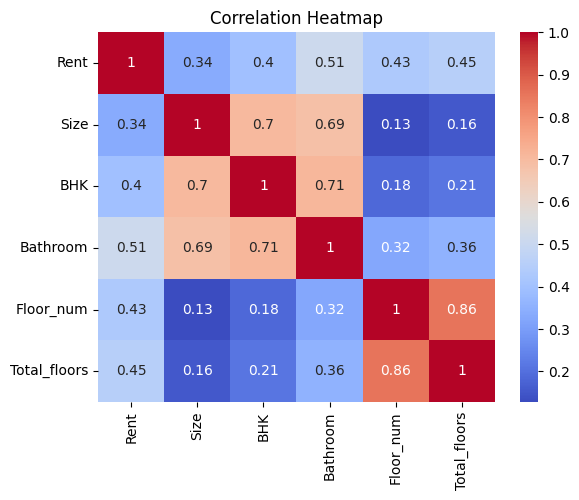

In [395]:
corr = df[['Rent', 'Size', 'BHK', 'Bathroom', 'Floor_num', 'Total_floors']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#**Feature Engineering**

In [396]:
categorical_cols = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact','Area Locality']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [397]:
df['Rent_per_sqft'] = df['Rent'] / df['Size']
df['Bath_per_BHK'] = df['Bathroom'] / df['BHK']

In [398]:
df.columns

Index(['BHK', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Rent', 'Post_Age_Days', 'Floor_num', 'Total_floors', 'RelativeFloor',
       'Rent_per_sqft', 'Bath_per_BHK'],
      dtype='object')

In [399]:
num_cols = ['Rent', 'Size', 'BHK', 'Bathroom',
             'Floor_num', 'Total_floors',
             'Rent_per_sqft', 'Bath_per_BHK', 'RelativeFloor']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# **Modeling**

In [400]:
df.dtypes[df.dtypes == 'object']

,0


In [401]:
df.shape

(4031, 16)

In [402]:
df.isnull().sum()

,0
BHK,0
Size,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,0
Point of Contact,0
Rent,0


In [403]:
df.describe()

,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Post_Age_Days,Floor_num,Total_floors,RelativeFloor,Rent_per_sqft,Bath_per_BHK
count,4.031000e+03,4.031000e+03,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4.031000e+03,4031.000000,4.031000e+03,4031.000000,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03
mean,-3.102345e-16,-5.640627e-17,0.820888,0.820888,2.945671,1.517986,1.231208,1.022364e-16,0.865542,-4.230470e-17,33.171173,-2.820314e-17,-5.640627e-17,1.304395e-16,1.410157e-17,-1.163379e-16
std,1.000124e+00,1.000124e+00,0.737624,0.737624,2.063334,0.888086,0.886417,1.000124e+00,0.604599,1.000124e+00,20.526844,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-1.458253e+00,-1.903026e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.145122e+00,0.000000,-5.909176e-01,0.000000,-1.023496e+00,-6.577724e-01,-4.807914e+00,-7.267545e-01,-2.435404e+00
25%,-1.219695e-02,-6.959477e-01,0.000000,0.000000,1.000000,1.000000,1.000000,-1.145122e+00,0.000000,-4.039194e-01,16.000000,-4.371243e-01,-4.138572e-01,-6.872836e-01,-4.562207e-01,1.422284e-01
50%,-1.219695e-02,-2.131165e-01,1.000000,1.000000,3.000000,1.000000,1.000000,1.654931e-01,1.000000,-2.976704e-01,31.000000,-2.416669e-01,-2.918996e-01,1.368425e-01,-3.343250e-01,1.422284e-01
75%,-1.219695e-02,5.111303e-01,1.000000,1.000000,5.000000,2.000000,1.000000,1.654931e-01,1.000000,2.107649e-02,49.000000,-4.620959e-02,-1.699419e-01,6.862599e-01,2.456457e-02,1.422284e-01
max,5.772028e+00,2.925286e+00,2.000000,2.000000,6.000000,3.000000,3.000000,5.407952e+00,2.000000,2.488334e+01,89.000000,1.422218e+01,8.732964e+00,1.785095e+00,2.102789e+01,7.015915e+00


In [404]:
def evaluate_models(df, target_col='Rent', test_size=0.2, random_state=42, encoding='auto'):
    """
    Runs multiple regression models, compares results, and tunes the best one automatically.
    """

    # Split features and target
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # Handle encoding automatically
    if encoding == 'auto':
        if X.select_dtypes(include='object').shape[1] > 0:
            print("Detected categorical features — applying OneHotEncoding automatically.")
            X = pd.get_dummies(X, drop_first=True)
    elif encoding == 'onehot':
        X = pd.get_dummies(X, drop_first=True)
    # if encoding == 'label' → do nothing

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Models to test
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Random Forest": RandomForestRegressor(random_state=random_state),
        "XGBoost": XGBRegressor(random_state=random_state, n_estimators=300, learning_rate=0.1)
    }

    results = []

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({
            "Model": name,
            "R² Score": round(r2, 4),
            "MAE": round(mae, 2),
            "RMSE": round(rmse, 2)
        })

    # Create a summary DataFrame
    results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False).reset_index(drop=True)
    print("\n Model Comparison:")
    display(results_df)

    # =================================
    # Tune the Best Model
    # =================================
    best_model_name = results_df.loc[0, "Model"]
    print(f"\n  Best Model Detected: {best_model_name}\n")

    # Parameter grids for all models
    param_grids = {
        "Linear Regression": {},
        "Ridge Regression": {'alpha': [0.1, 1.0, 10.0, 50.0]},
        "Lasso Regression": {'alpha': [0.001, 0.01, 0.1, 1.0]},
        "Random Forest": {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        },
        "XGBoost": {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }

    if best_model_name in param_grids and param_grids[best_model_name]:
        print(f" Tuning hyperparameters for {best_model_name}...")
        model = models[best_model_name]
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[best_model_name],
            scoring='r2',
            cv=3,
            verbose=1,
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)

        print("\n Best Parameters Found:")
        print(grid_search.best_params_)
        print(f" Best Cross-Validation R²: {grid_search.best_score_:.4f}")

        # Evaluate tuned model
        tuned_model = grid_search.best_estimator_
        y_pred_tuned = tuned_model.predict(X_test)

        print("\n Final Evaluation after Tuning:")
        print("R² Score:", round(r2_score(y_test, y_pred_tuned), 4))
        print("MAE:", round(mean_absolute_error(y_test, y_pred_tuned), 2))
        print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_tuned)), 2))
    else:
        print(" No hyperparameter tuning applied (model has no tunable params).")

    return results_df


# ======================
# Run All Models
# ======================
results = evaluate_models(df, target_col='Rent', encoding='label')


 Model Comparison:


,Model,R² Score,MAE,RMSE
0,XGBoost,0.9499,0.03,0.27
1,Random Forest,0.8940,0.03,0.39
2,Linear Regression,0.6749,0.24,0.68
3,Ridge Regression,0.6748,0.24,0.68
4,Lasso Regression,0.0054,0.51,1.19



  Best Model Detected: XGBoost

 Tuning hyperparameters for XGBoost...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

 Best Parameters Found:
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
 Best Cross-Validation R²: 0.9628

 Final Evaluation after Tuning:
R² Score: 0.9145
MAE: 0.04
RMSE: 0.35
